In [23]:
# First Solution - Descriptive Analysys
# 1.1) Analyze the distribution of movie ratings. What percentage of movies have high (5), medium (3-4), and low (1-2) ratings?
# 1.2) Identify the top 10 most-rated movies

ratings = open(r"C:\Users\Dell\Downloads\ml-1m\ml-1m\ratings.dat")
rating_distribution = dict()
movieId_count = dict()

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    if columns[2] == 5:
        columns.append('High')
    elif columns[2] == 4 or columns[2] == 3:
        columns.append('Medium')
    else:
        columns.append('Low')

    if columns[1] in movieId_count:
        movieId_count[columns[1]] += 1
    else: 
        movieId_count[columns[1]] = 1

    if columns[4] in rating_distribution:
        rating_distribution[columns[4]] += 1
    else:
        rating_distribution[columns[4]] = 1

for rating_range in rating_distribution:
    print('{0} {1}'.format(rating_range, int(rating_distribution[rating_range] / sum(rating_distribution.values()) * 100)))

movies = open(r"C:\Users\Dell\Downloads\ml-1m\ml-1m\movies.dat")
movieId_name = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieId_name[int(columns[0])] = columns[1]
    
sorted_counted_data = sorted(movieId_count.items(), key = lambda x:x[1], reverse=True)[:10]
for movieId, count in sorted_counted_data:
    print(movieId_name[movieId], count)

High 22
Medium 61
Low 16
American Beauty (1999) 3428
Star Wars: Episode IV - A New Hope (1977) 2991
Star Wars: Episode V - The Empire Strikes Back (1980) 2990
Star Wars: Episode VI - Return of the Jedi (1983) 2883
Jurassic Park (1993) 2672
Saving Private Ryan (1998) 2653
Terminator 2: Judgment Day (1991) 2649
Matrix, The (1999) 2590
Back to the Future (1985) 2583
Silence of the Lambs, The (1991) 2578


In [22]:
# Second solution - Genre Insights
# 2.1) Which movie genres are the most frequently rated?`

genre = open(r"C:\Users\Dell\Downloads\ml-1m\ml-1m\movies.dat")
genre_name = dict()
genre_count = dict()

for line in genre:
    line = line.strip()
    columns = line.split("::")
    movie_id = int(columns[0])
    genres = columns[2].split('|')  # Movies can have multiple genres

    genre_name[movie_id] = columns[2]  # Stores genres for each movie

    # Count occurrences of each genre
    for g in genres:
        genre_count[g] = genre_count.get(g, 0) + 1  # Increment genre count

# Sort genres by count in descending order and take the top 10
sorted_counted_data = sorted(genre_count.items(), key=lambda x: x[1], reverse=True)[:5]
print("Most frequently rated genres with their count:")
# Print top 10 genres with counts
for genre, count in sorted_counted_data:
    print(genre, count)

print("==========================================")

# 2.2) Compare the average ratings across different genres. Are certain genres consistently rated higher or lower?`

ratings_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\ratings.dat"
movies_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\movies.dat"

# Read ratings data
with open(ratings_file, 'r') as ratings:
    ratings_data = [list(map(int, line.strip().split('::'))) for line in ratings]

# Read movies data
movieId_genres = {}
with open(movies_file, 'r') as movies:
    for line in movies:
        parts = line.strip().split('::')
        movieId = int(parts[0])
        genres = parts[2].split('|')
        movieId_genres[movieId] = genres

# Aggregate ratings by genre
genre_ratings = {}
genre_counts = {}

for userId, movieId, rating, timestamp in ratings_data:
    if movieId in movieId_genres:
        for genre in movieId_genres[movieId]:
            if genre in genre_ratings:
                genre_ratings[genre] += rating
                genre_counts[genre] += 1
            else:
                genre_ratings[genre] = rating
                genre_counts[genre] = 1

# Compute average ratings per genre
average_ratings = {genre: genre_ratings[genre] / genre_counts[genre] for genre in genre_ratings}

# Sort genres by average rating
sorted_genres = sorted(average_ratings.items(), key=lambda x: x[1], reverse=True)

# Print average ratings for genres
print("Genre-wise Average Ratings:")
for genre, avg_rating in sorted_genres:
    print(f"{genre}: {avg_rating:.2f}")

# Find genre with highest and lowest average ratings
highest_rated_genre = max(average_ratings, key=average_ratings.get)
lowest_rated_genre = min(average_ratings, key=average_ratings.get)
print(f"\nHighest Rated Genre: {highest_rated_genre} ({average_ratings[highest_rated_genre]:.2f})")
print(f"Lowest Rated Genre: {lowest_rated_genre} ({average_ratings[lowest_rated_genre]:.2f})")



Most frequently rated genres with their count:
Drama 1603
Comedy 1200
Action 503
Thriller 492
Romance 471
Genre-wise Average Ratings:
Film-Noir: 4.08
Documentary: 3.93
War: 3.89
Drama: 3.77
Crime: 3.71
Animation: 3.68
Mystery: 3.67
Musical: 3.67
Western: 3.64
Romance: 3.61
Thriller: 3.57
Comedy: 3.52
Action: 3.49
Adventure: 3.48
Sci-Fi: 3.47
Fantasy: 3.45
Children's: 3.42
Horror: 3.22

Highest Rated Genre: Film-Noir (4.08)
Lowest Rated Genre: Horror (3.22)


In [1]:
# Third Solution: User Engagement Analysis
# 3.1) Identify the most active users (profession) based on the number of ratings they’ve given.`
#3.2) Analyze the relationship between user demographic attributes (age, gender, occupation) and their movie preferences or rating patterns.`


ratings_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\ratings.dat"
users_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\users.dat"
movies_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\movies.dat"

# Read ratings data
with open(ratings_file, 'r') as ratings:
    ratings_data = [list(map(int, line.strip().split('::')[:3])) for line in ratings]

# Read users data to extract occupation
user_occupation = {}
with open(users_file, 'r') as users:
    for line in users:
        parts = line.strip().split('::')
        user_id = int(parts[0])
        occupation = int(parts[3])  # Occupation is the 4th column
        user_occupation[user_id] = occupation

# Count ratings by occupation
occupation_rating_counts = {}
for user_id, movie_id, rating in ratings_data:
    if user_id in user_occupation:
        occupation = user_occupation[user_id]
        occupation_rating_counts[occupation] = occupation_rating_counts.get(occupation, 0) + 1

# Sort occupations by count of ratings
sorted_occupation_counts = sorted(occupation_rating_counts.items(), key=lambda x: x[1], reverse=True)[:5]

# Print count of ratings for each occupation

print("Occupation-wise Maximum Rating Counts:",sorted(occupation_rating_counts.items(), key=lambda x: x[1], reverse=True)[:5])
print("Most active users (professions):")
for occupation, count in sorted_occupation_counts:
    print(f"Occupation {occupation}")

print("=======================================================================================================")
print("=======================================================================================================")
print("=======================================================================================================")


# 3.2) Analyze the relationship between user demographic attributes (age, gender, occupation) and their movie preferences or rating patterns.


ratings_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\ratings.dat"
users_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\users.dat"
movies_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\movies.dat"


# Step 1: Read users.dat and store user demographics
users_dict = {}  # {UserID: (Gender, Age, Occupation)}
with open(users_file, "r", encoding="utf-8") as users_file:
    for line in users_file:
        parts = line.strip().split("::")
        if len(parts) >= 4:
            user_id = parts[0]
            gender = parts[1]
            age = parts[2]
            occupation = parts[3]
            users_dict[user_id] = (gender, age, occupation)

# Step 2: Read movies.dat and store movie genres
movies_dict = {}  # {MovieID: [Genres]}
with open(movies_file, "r") as movies_file:
    for line in movies_file:
        parts = line.strip().split("::")
        if len(parts) >= 3:
            movie_id = parts[0]
            genres = parts[2].split("|")  # Split multiple genres
            movies_dict[movie_id] = genres

# Step 3: Read ratings.dat and aggregate ratings based on (Age, Gender, Occupation, Genre)
genre_ratings = {}  # {(Age, Gender, Occupation, Genre): {"sum": total_ratings, "count": num_ratings}}

with open(ratings_file, "r", encoding="utf-8") as ratings_file:
    for line in ratings_file:
        parts = line.strip().split("::")
        if len(parts) >= 3:
            user_id = parts[0]
            movie_id = parts[1]
            rating = int(parts[2])  # Convert rating to integer

            if user_id in users_dict and movie_id in movies_dict:
                gender, age, occupation = users_dict[user_id]
                genres = movies_dict[movie_id]

                for genre in genres:
                    key = (age, gender, occupation, genre)
                    if key not in genre_ratings:
                        genre_ratings[key] = {"sum": 0, "count": 0}

                    genre_ratings[key]["sum"] += rating
                    genre_ratings[key]["count"] += 1

# Step 4: Find the highest-rated genre for each (Age, Gender, Occupation) group
highest_rated_genre = {}  # {(Age, Gender, Occupation): (Genre, Avg_Rating)}

for key, values in genre_ratings.items():
    age, gender, occupation, genre = key
    avg_rating = values["sum"] / values["count"]

    user_group_key = (age, gender, occupation)
    
    if user_group_key not in highest_rated_genre or avg_rating > highest_rated_genre[user_group_key][1]:
        highest_rated_genre[user_group_key] = (genre, avg_rating)

# Step 5: Sort the results by Age in ascending order
sorted_results = sorted(highest_rated_genre.items(), key=lambda x: x[0][0])  # Sorting based on Age (x[0][0])

# Step 6: Print the results
print("Relationship Analysis between users and their movie preferences")

print(f"{'Age':<6} {'Gender':<8} {'Occupation':<12} {'Highest Rated Genre':<20} {'Avg Rating':<10}")
print("-" * 60)

for key, value in sorted_results:
    age, gender, occupation = key
    genre, avg_rating = value
    print(f"{age:<6} {gender:<8} {occupation:<12} {genre:<20} {avg_rating:<10.2f}")




Occupation-wise Maximum Rating Counts: [(4, 131032), (0, 130499), (7, 105425), (1, 85351), (17, 72816)]
Most active users (professions):
Occupation 4
Occupation 0
Occupation 7
Occupation 1
Occupation 17
Relationship Analysis between users and their movie preferences
Age    Gender   Occupation   Highest Rated Genre  Avg Rating
------------------------------------------------------------
1      F        10           Film-Noir            3.90      
1      M        10           Film-Noir            4.36      
1      M        0            Documentary          4.00      
1      M        19           Documentary          4.60      
1      F        2            Documentary          5.00      
1      M        17           War                  4.50      
1      F        0            Documentary          4.50      
1      M        14           Animation            5.00      
1      M        1            Fantasy              4.30      
1      M        8            War                  4.50      
1

In [35]:
# 4th solution - Rating Distribution by Demographics
# 4.1) Investigate how ratings vary by user demographic attributes (age, gender, occupation).

ratings_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\ratings.dat"
users_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\users.dat"
movies_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\movies.dat"

# Step 1: Read users.dat and store user demographics
users_dict = {}  # {UserID: (Gender, Age, Occupation)}
with open(users_file, "r", encoding="utf-8") as users_file:
    for line in users_file:
        parts = line.strip().split("::")
        if len(parts) >= 4:
            user_id = parts[0]
            gender = parts[1]
            age = parts[2]
            occupation = parts[3]
            users_dict[user_id] = (gender, age, occupation)

# Step 2: Read ratings.dat and aggregate ratings based on user demographics
# {("Gender", "Age", "Occupation"): {"sum": total_ratings, "count": num_ratings}}
rating_by_demo = {}

with open(ratings_file, "r", encoding="utf-8") as ratings_file:
    for line in ratings_file:
        parts = line.strip().split("::")
        if len(parts) >= 3:
            user_id = parts[0]
            rating = int(parts[2])  # Convert rating to integer

            # If the user exists in users.dat
            if user_id in users_dict:
                gender, age, occupation = users_dict[user_id]

                # Create a key for the demographic group
                demo_group = (gender, age, occupation)
                
                if demo_group not in rating_by_demo:
                    rating_by_demo[demo_group] = {"sum": 0, "count": 0}
                
                rating_by_demo[demo_group]["sum"] += rating
                rating_by_demo[demo_group]["count"] += 1

# Step 3: Calculate average ratings for each demographic group
avg_ratings_by_demo = {}

for demo_group, values in rating_by_demo.items():
    avg_rating = values["sum"] / values["count"]
    avg_ratings_by_demo[demo_group] = avg_rating

# Step 4: Display the results
print("The ratings vary by user demographic attributes (age, gender, occupation):")

print(f"{'Gender':<8} {'Age':<6} {'Occupation':<12} {'Avg Rating':<10}")
print("-" * 40)

for demo_group, avg_rating in avg_ratings_by_demo.items():
    gender, age, occupation = demo_group
    print(f"{gender:<8} {age:<6} {occupation:<12} {avg_rating:<10.2f}")



The ratings vary by user demographic attributes (age, gender, occupation):
Gender   Age    Occupation   Avg Rating
----------------------------------------
F        1      10           3.58      
M        56     16           3.46      
M        25     15           3.56      
M        45     7            3.70      
M        25     20           3.46      
F        50     9            3.95      
M        35     1            3.49      
M        25     12           3.61      
M        25     17           3.60      
F        35     1            3.65      
F        25     1            3.52      
M        45     1            3.76      
M        35     0            3.60      
M        25     7            3.52      
F        35     0            3.75      
M        50     1            3.70      
F        18     3            3.79      
M        1      10           3.49      
M        25     14           3.59      
M        18     16           3.53      
M        18     15           3.82      
F   

In [1]:
# 4.2) Are there specific genres preferred by certain age groups or occupations?


ratings_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\ratings.dat"
users_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\users.dat"
movies_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\movies.dat"


# Step 1: Read users.dat and store user demographics
users_dict = {}  # {UserID: (Gender, Age, Occupation)}
with open(users_file, "r", encoding="utf-8") as users_file:
    for line in users_file:
        parts = line.strip().split("::")
        if len(parts) >= 4:
            user_id = parts[0]
            gender = parts[1]
            age = parts[2]
            occupation = parts[3]
            users_dict[user_id] = (gender, age, occupation)

# Step 2: Read movies.dat and store genres for each movie
movies_dict = {}  # {MovieID: [Genres]}
with open( movies_file,"r") as movies_file:
    for line in movies_file:
        parts = line.strip().split("::")
        if len(parts) >= 3:
            movie_id = parts[0]
            genres = parts[2].split("|")  # Split multiple genres
            movies_dict[movie_id] = genres

# Step 3: Read ratings.dat and associate ratings with user demographics and movie genres
# {("Age", "Occupation"): {Genre: count}}
genre_preference_by_demo = {}

with open(ratings_file, "r", encoding="utf-8") as ratings_file:
    for line in ratings_file:
        parts = line.strip().split("::")
        if len(parts) >= 3:
            user_id = parts[0]
            movie_id = parts[1]
            rating = int(parts[2])  # Convert rating to integer

            # If the user exists in users.dat and movie exists in movies.dat
            if user_id in users_dict and movie_id in movies_dict:
                age, occupation = users_dict[user_id][1], users_dict[user_id][2]
                genres = movies_dict[movie_id]

                for genre in genres:
                    # Group by (Age, Occupation) and count genres
                    demo_group = (age, occupation)
                    if demo_group not in genre_preference_by_demo:
                        genre_preference_by_demo[demo_group] = {}

                    if genre not in genre_preference_by_demo[demo_group]:
                        genre_preference_by_demo[demo_group][genre] = 0

                    genre_preference_by_demo[demo_group][genre] += 1

# Step 4: Display top 3 preferences for each Age group and Occupation
print(f"{'Age':<6} {'Occupation':<12} {'Top 3 Prefered Genres':<40}")
print("-" * 60)

for demo_group, genres in genre_preference_by_demo.items():
    age, occupation = demo_group
    # Sort genres by count in descending order and get top 3
    sorted_genres = sorted(genres.items(), key=lambda x: x[1], reverse=True)[:3]
    
    # Format top 3 genres
    top_3_genres = ", ".join([f"{genre} ({count})" for genre, count in sorted_genres])
    
    print(f"{age:<6} {occupation:<12} {top_3_genres:<40}")



Age    Occupation   Top 3 Prefered Genres                   
------------------------------------------------------------
1      10           Comedy (8238), Drama (4906), Action (4869)
56     16           Drama (1382), Comedy (1103), Action (865)
25     15           Drama (4592), Comedy (4303), Action (3645)
45     7            Drama (4400), Comedy (3771), Action (2994)
25     20           Drama (9694), Comedy (9405), Action (5179)
50     9            Drama (296), Comedy (283), Romance (163)
35     1            Drama (7053), Comedy (5907), Action (3904)
25     12           Comedy (9668), Action (8793), Drama (8254)
25     17           Comedy (10668), Action (10274), Drama (9277)
25     1            Drama (13307), Comedy (12118), Action (7796)
45     1            Drama (5479), Comedy (4310), Action (2489)
35     0            Drama (8469), Comedy (8193), Action (6195)
25     7            Drama (15731), Comedy (15503), Action (11698)
50     1            Drama (3569), Comedy (2574), Action

In [16]:
# 5th Solution - Top Performers
# 5.1) Identify the movies with the highest average ratings (considering a minimum number of ratings for fairness).
# 5.2) `Analyze the characteristics of top-rated movies (e.g., release year, genres).
ratings_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\ratings.dat"
movies_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\movies.dat"

# Step 1: Read movies file and create a dictionary
movie_dict = {}  # {Movie_Id: (Title, Genres, Year)}
with open(movies_file, "r", encoding="latin-1") as movies_file:
    for line in movies_file:
        parts = line.strip().split("::")
        if len(parts) >= 3:
            movie_id = parts[0]
            title = parts[1]
            genres = parts[2]
            year = title.strip()[-5:-1] if title.strip()[-1] == ')' and title.strip()[-6] == '(' else "Unknown"
            movie_dict[movie_id] = (title, genres, year)

# Step 2: Read ratings file and calculate average ratings
ratings_count = {}  # {Movie_Id: Count of ratings}
ratings_sum = {}  # {Movie_Id: Sum of ratings}

with open(ratings_file, "r") as ratings_file:
    for line in ratings_file:
        parts = line.strip().split("::")
        if len(parts) >= 4:
            movie_id = parts[1]
            rating = float(parts[2])
            if movie_id in ratings_count:
                ratings_count[movie_id] += 1
                ratings_sum[movie_id] += rating
            else:
                ratings_count[movie_id] = 1
                ratings_sum[movie_id] = rating

# Step 3: Compute average ratings
min_ratings = 50  # Set the minimum number of ratings for fairness
average_ratings = {}
for movie_id in ratings_count:
    if ratings_count[movie_id] >= min_ratings:
        average_ratings[movie_id] = ratings_sum[movie_id] / ratings_count[movie_id]

# Step 4: Find the top 10 movies with the highest average ratings
top_movies = sorted(average_ratings.items(), key=lambda x: x[1], reverse=True)[:10]

# Step 5: Print the top 10 best-rated movies with title and year
print("Movies with the highest average rating:")
year_count = {}  # To analyze movie release year trends
genre_count = {}  # To analyze genre trends

for movie_id, avg_rating in top_movies:
    title, genres, year = movie_dict.get(movie_id, ("Unknown", "Unknown", "Unknown"))
    print(f"{title} ({year}) - {avg_rating:.2f}")
    
    # Count occurrences of release years
    if year != "Unknown":
        year_count[year] = year_count.get(year, 0) + 1
    
    # Count occurrences of genres
    for genre in genres.split("|"):
        genre_count[genre] = genre_count.get(genre, 0) + 1


# 5.2)`Analyze the characteristics of top-rated movies (e.g., release year, genres).

# Step 6: Analyze characteristics of top-rated movies
print("\nTop-rated movies analysis:")
print("Most common release years:")
for year, count in sorted(year_count.items(), key=lambda x: x[1], reverse=True):
    print(f"{year}: {count} movies")

print("\nMost common genres:")
for genre, count in sorted(genre_count.items(), key=lambda x: x[1], reverse=True):
    print(f"{genre}: {count} movies")



Movies with the highest average rating:
Sanjuro (1962) (1962) - 4.61
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954) (1954) - 4.56
Shawshank Redemption, The (1994) (1994) - 4.55
Godfather, The (1972) (1972) - 4.52
Close Shave, A (1995) (1995) - 4.52
Usual Suspects, The (1995) (1995) - 4.52
Schindler's List (1993) (1993) - 4.51
Wrong Trousers, The (1993) (1993) - 4.51
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) (1950) - 4.49
Raiders of the Lost Ark (1981) (1981) - 4.48

Top-rated movies analysis:
Most common release years:
1995: 2 movies
1993: 2 movies
1962: 1 movies
1954: 1 movies
1994: 1 movies
1972: 1 movies
1950: 1 movies
1981: 1 movies

Most common genres:
Action: 4 movies
Drama: 4 movies
Adventure: 2 movies
Crime: 2 movies
Animation: 2 movies
Comedy: 2 movies
Thriller: 2 movies
War: 1 movies
Film-Noir: 1 movies


In [54]:
# 6th Solution - Exploring Long Tail

# 6.1) `Investigate the "long tail" of the dataset: How many movies receive very few ratings?`
# 6.2) What are the characteristics of these less-rated movies compared to popular ones?`
ratings_file_path = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\ratings.dat"
movies_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\movies.dat"
movie_counts = {}  # Dictionary to store movie_id and its count

# Open the file and read line by line
with open(ratings_file_path, "r", encoding="utf-8") as file:
    for line in file:
        line = line.strip()  # Remove extra spaces and newlines
        if not line:  # Skip empty lines
            continue

        columns = line.split("::")  # MovieLens 1M uses "::" as the separator
        if len(columns) < 3:  # Ensure the line has at least user_id, movie_id, and rating
            continue

        movie_id = columns[1].strip()  # Extract movie_id (second column)
        if movie_id:  # Ensure movie_id is not empty
            movie_counts[movie_id] = movie_counts.get(movie_id, 0) + 1

# Find total movies and movies with very few ratings (e.g., fewer than 3 ratings)
total_movies = len(movie_counts)
low_rating_movies = {movie_id for movie_id, count in movie_counts.items() if count < 5}
popular_movies = {movie_id for movie_id, count in movie_counts.items() if count > 150}

# Print results for low-rated movies
if total_movies == 0:
    print("No movies found in the dataset.")
else:
    print(f"Total movies: {total_movies}")
    print(f"Movies with fewer than 5 ratings: {len(low_rating_movies)} ({(len(low_rating_movies) / total_movies) * 100:.2f}%)")
  

# 6.2) Characteristics of Less-Rated Movies vs. Popular Ones

# Extract details of movies
low_rated_movie_details = []
popular_movie_details = []

with open(movies_file, "r"
         ) as file:
    for line in file:
        columns = line.strip().split("::")
        if len(columns) < 3:  # Ensure correct format
            continue

        movie_id = columns[0].strip()  # First column is Movie ID
        title = columns[1].strip()  # Second column is Title (with Year)
        genres = columns[2].strip()  # Third column is Genres
        
        if movie_id in low_rating_movies:  # Check if this movie has <3 ratings
            low_rated_movie_details.append((movie_id, title, genres))
        if movie_id in popular_movies:  # Check if this movie has >150 ratings
            popular_movie_details.append((movie_id, title, genres))

# Print characteristics of low-rated and popular movies
print("\n--- Characteristics of Movies with Fewer than 5 Ratings ---")
for movie_id, title, genres in low_rated_movie_details[:5]:  # Limit output to first 5 movies
    print(f"Movie ID: {movie_id}, Title: {title}, Genres: {genres}")

print("\n--- Characteristics of Popular Movies (More than 150 Ratings) ---")
for movie_id, title, genres in popular_movie_details[:5]:  # Limit output to first 5 movies
    print(f"Movie ID: {movie_id}, Title: {title}, Genres: {genres}")


Total movies: 3706
Movies with fewer than 5 ratings: 290 (7.83%)

--- Characteristics of Movies with Fewer than 5 Ratings ---
Movie ID: 33, Title: Wings of Courage (1995), Genres: Adventure|Romance
Movie ID: 67, Title: Two Bits (1995), Genres: Drama
Movie ID: 120, Title: Race the Sun (1996), Genres: Drama
Movie ID: 127, Title: Silence of the Palace, The (Saimt el Qusur) (1994), Genres: Drama
Movie ID: 130, Title: Angela (1995), Genres: Drama

--- Characteristics of Popular Movies (More than 150 Ratings) ---
Movie ID: 1, Title: Toy Story (1995), Genres: Animation|Children's|Comedy
Movie ID: 2, Title: Jumanji (1995), Genres: Adventure|Children's|Fantasy
Movie ID: 3, Title: Grumpier Old Men (1995), Genres: Comedy|Romance
Movie ID: 4, Title: Waiting to Exhale (1995), Genres: Comedy|Drama
Movie ID: 5, Title: Father of the Bride Part II (1995), Genres: Comedy


In [56]:
# File paths
movies_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\movies.dat"

# Dictionary to store tag counts
tag_counts = {}

# Open the tags file and read line by line
with open(r"C:\Users\Dell\Downloads\ml-1m\ml-1m\movies.dat", "r") as file:
    for line in file:
        line = line.strip()  # Remove extra spaces and newlines
        if not line:  # Skip empty lines
            continue
        
        # Split line by "::" to get user_id, movie_id, and tag
        columns = line.split("::")
        if len(columns) < 3:  # Ensure there are enough columns (user_id, movie_id, tag)
            continue
        
        tag = columns[2].strip()  # Extract tag (third column)
        
        # Increment the count for the tag in the dictionary
        tag_counts[tag] = tag_counts.get(tag, 0) + 1

# Sort the tags by frequency in descending order
sorted_tags = sorted(tag_counts.items(), key=lambda x: x[1], reverse=True)

# Print the most frequently used tags (top 10)
print("\nTop 10 Most Frequently Used Tags:")
for tag, count in sorted_tags[:10]:  # Display top 10 tags
    print(f"Tag: {tag}, Frequency: {count}")



Top 10 Most Frequently Used Tags:
Tag: Drama, Frequency: 843
Tag: Comedy, Frequency: 521
Tag: Horror, Frequency: 178
Tag: Comedy|Drama, Frequency: 162
Tag: Comedy|Romance, Frequency: 142
Tag: Drama|Romance, Frequency: 134
Tag: Documentary, Frequency: 116
Tag: Thriller, Frequency: 101
Tag: Action, Frequency: 65
Tag: Drama|Thriller, Frequency: 63


In [1]:
# 7 th solution - Tag analysis
# 7.1) Analyze the tags associated with movies. What are the most frequently used tags?
# 7.2) Are tags consistent with movie genres?


movies_file_path = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\movies.dat"

# Set of all possible movie genres (known genres)
known_genres = {
    'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 
    'Mystery', 'Romance', 'Sci-Fi', 'Thriller'
}

# Dictionary to store movie genres
all_genres = []

# Dictionary to store movie_id and its genres
movie_genres = {}

# Open the file and read line by line
with open(movies_file_path, "r") as file:
    for line in file:
        line = line.strip()  # Remove extra spaces and newlines
        if not line:  # Skip empty lines
            continue

        columns = line.split("::")  # MovieLens 1M uses "::" as the separator
        if len(columns) < 3:  # Ensure the line has at least movie_id, title, and genre
            continue

        movie_id = columns[0].strip()  # Extract movie_id (first column)
        genres = columns[2].strip().split("|")  # Extract and split movie genres (third column)

        # Store movie genres in the dictionary
        movie_genres[movie_id] = genres

        # Add genres to the all_genres list
        all_genres.extend(genres)

# Count the frequency of each genre (using dictionary to count occurrences)
genre_counts = {}
for genre in all_genres:
    if genre in genre_counts:
        genre_counts[genre] += 1
    else:
        genre_counts[genre] = 1

# Sort the genres by frequency
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:]

# Display the most frequently used genres (tags)
print("Most frequently used genres (tags):")
for genre, count in sorted_genres:
    print(f"{genre}: {count}")


print("The tags are same as the genres")






Most frequently used genres (tags):
Drama: 1603
Comedy: 1200
Action: 503
Thriller: 492
Romance: 471
Horror: 343
Adventure: 283
Sci-Fi: 276
Children's: 251
Crime: 211
War: 143
Documentary: 127
Musical: 114
Mystery: 106
Animation: 105
Fantasy: 68
Western: 68
Film-Noir: 44
The tags are same as the genres


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data Function
def load_data():
    try:
        ratings = pd.read_csv('ratings.dat')
        movies = pd.read_csv('movies.dat')
        users = pd.read_csv('users.dat')
        return ratings, movies, users
    except Exception as e:
        print(f"Error loading data: {e}")
        return None, None, None

# Create Dashboard Function
def create_dashboard(ratings, movies, users):
    # Merge the datasets
    merged_data = ratings.merge(movies, on="movieId", how="left")
    merged_data = merged_data.merge(users, on="userId", how="left")
    
    # Remove unnecessary columns and handle data types to optimize memory usage
    merged_data = merged_data.astype({"Rating": "float32"})
    
    # Get the genres columns
    genres_data = merged_data['genres'].str.get_dummies(sep="|")
    
    # Merge genres data with the main dataframe
    merged_data = pd.concat([merged_data, genres_data], axis=1)
    
    # Average rating per genre
    genre_ratings = merged_data[genres_data.columns].mul(merged_data["Rating"], axis=0).sum() / merged_data[genres_data.columns].sum()
    
    print("\n⭐ Average Ratings by Genre")
    plt.figure(figsize=(12, 6))
    genre_ratings.sort_values(ascending=False).plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title("Average Ratings by Genre")
    plt.ylabel("Average Rating")
    plt.xticks(rotation=45)
    plt.show()

    # Popular Genres by Age Group
    print("\n👥 Popular Genres by Age Group")
    age_groups = merged_data.groupby("Age")[genres_data.columns].sum()
    plt.figure(figsize=(12, 6))
    age_groups.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm", edgecolor="black")
    plt.title("Popular Genres by Age Group")
    plt.ylabel("Number of Ratings")
    plt.xticks(rotation=45)
    plt.show()

    # Heatmap: Correlation Between Genres, User Activity, and Ratings
    print("\n🌡️ Heatmap: Correlation Between Genres, User Activity, and Ratings")
    corr_data = merged_data[genres_data.columns.tolist() + ['Rating'] + ['Age', 'Gender']]
    correlation_matrix = corr_data.corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, annot_kws={"size": 10})
    plt.title("Correlation Between Genres, User Activity, and Ratings")
    plt.show()

# Main function to load data and create the dashboard
def main():
    ratings, movies, users = load_data()
    
    if ratings is not None and movies is not None and users is not None:
        create_dashboard(ratings, movies, users)
    else:
        print("❌ Dashboard could not be created due to errors in data loading.")

if __name__ == "__main__":
    main()


Error loading data: 'utf-8' codec can't decode byte 0xe9 in position 3114: invalid continuation byte
❌ Dashboard could not be created due to errors in data loading.


📊 Movie Ratings Analysis Dashboard



C:\Users\Dell\AppData\Local\Temp\ipykernel_24548\1282477301.py:26: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.






⭐ Average Ratings by Genre


C:\Users\Dell\AppData\Local\Temp\ipykernel_24548\1282477301.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




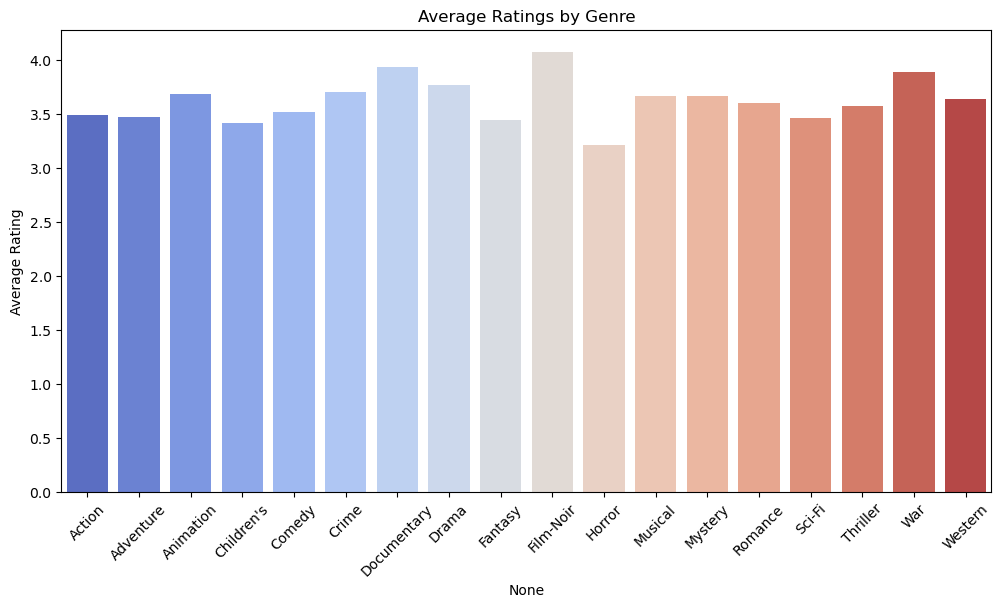


📅 Average Ratings Over the Years


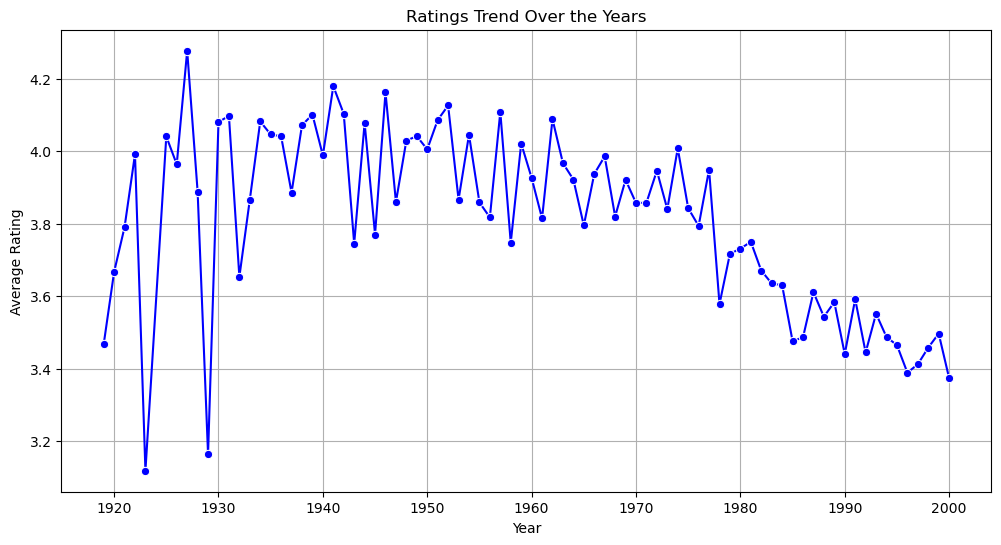


👥 Popular Genres by Age Group


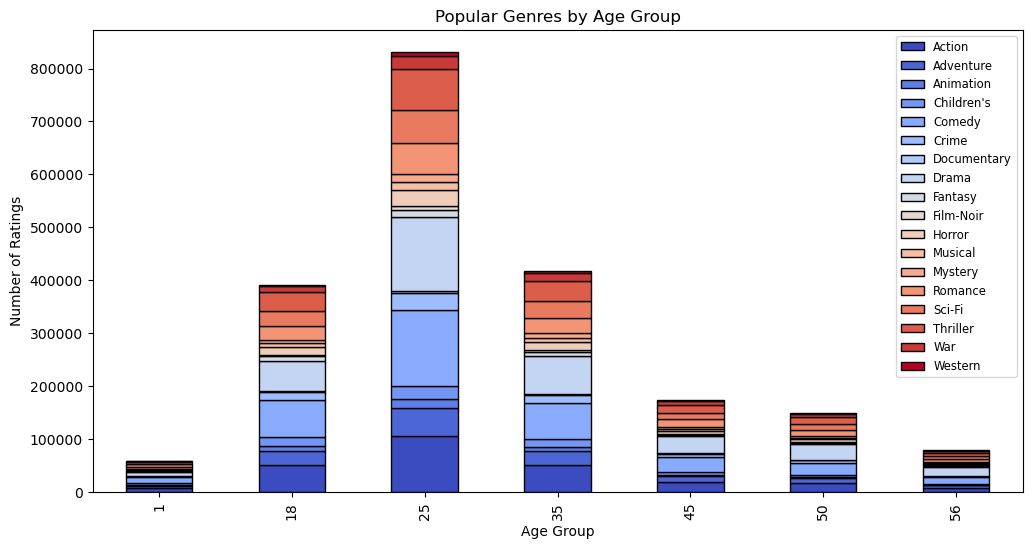


👥 Popular Genres by Gender


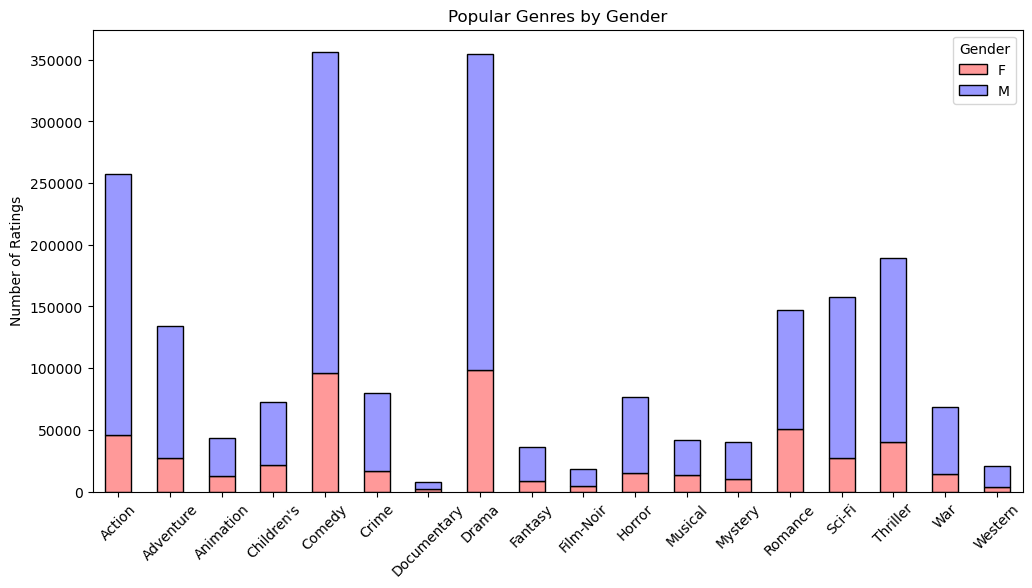


📊 Heatmap: Correlation Between Genres, Ratings & Demographics


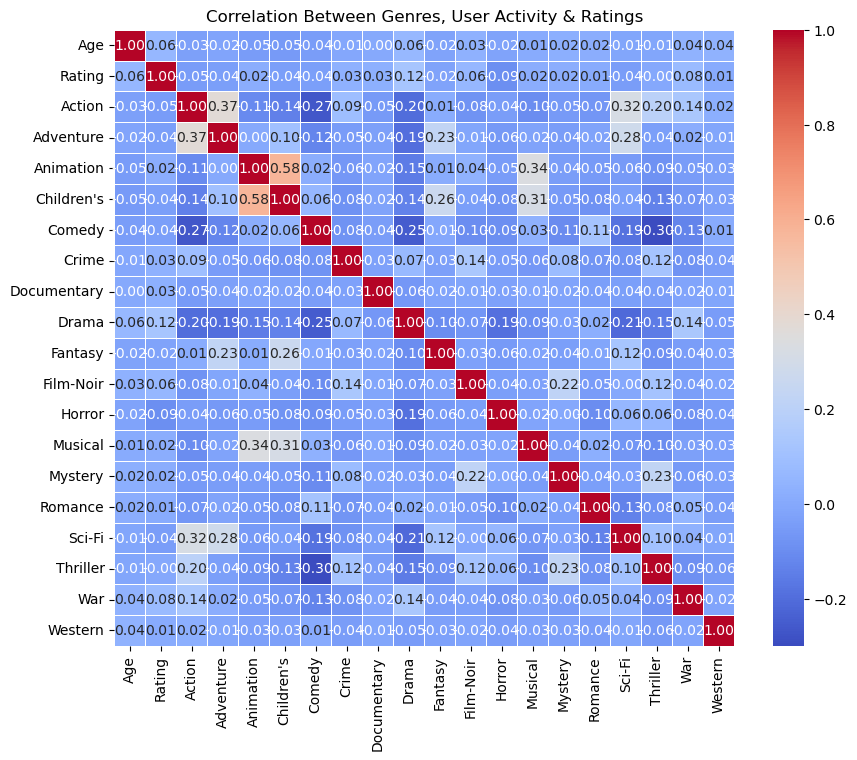


🎬 Sample Data Preview


,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,ZipCode,Title,Genres,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical,...,0,0,0,1,0,0,0,0,0,0
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance,...,0,0,0,1,0,1,0,0,0,0
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#!/usr/bin/env python
# coding: utf-8

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

def load_data():
    """
    Load the ratings, movies, and users datasets from specified file paths.
    """
    try:
        # Correct file paths
        ratings_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\ratings.dat"
        movies_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\movies.dat"
        users_file = r"C:\Users\Dell\Downloads\ml-1m\ml-1m\users.dat"

        # Load data with correct encoding
        ratings = pd.read_csv(ratings_file, sep="::", names=["UserID", "MovieID", "Rating", "Timestamp"], engine="python", encoding="ISO-8859-1")
        movies = pd.read_csv(movies_file, sep="::", names=["MovieID", "Title", "Genres"], engine="python", encoding="ISO-8859-1")
        users = pd.read_csv(users_file, sep="::", names=["UserID", "Gender", "Age", "Occupation", "ZipCode"], engine="python", encoding="ISO-8859-1")

        # Extract release year from movie titles
        movies["Year"] = movies["Title"].str.extract(r"\((\d{4})\)").astype(float)
        movies["Year"].fillna(0, inplace=True)  # Handling missing years

        return ratings, movies, users

    except Exception as e:
        print(f"❌ Error while loading data: {e}")
        return None, None, None

def create_dashboard(ratings, movies, users):
    """
    Create dashboards for analyzing movie ratings data.
    """
    # Merge datasets
    merged_data = pd.merge(pd.merge(ratings, users, on="UserID"), movies, on="MovieID")

    # 🔹 1. Distribution of Ratings by Genres and Years
    genres_data = merged_data["Genres"].str.get_dummies("|")  # One-hot encoding genres
    merged_data = pd.concat([merged_data, genres_data], axis=1)  # Merge with main dataframe

    # Average rating per genre
    genre_ratings = merged_data[genres_data.columns].multiply(merged_data["Rating"], axis=0).sum() / merged_data[genres_data.columns].sum()
    
    print("\n⭐ Average Ratings by Genre")
    plt.figure(figsize=(12, 6))
    sns.barplot(x=genre_ratings.index, y=genre_ratings.values, palette="coolwarm")
    plt.xticks(rotation=45)
    plt.ylabel("Average Rating")
    plt.title("Average Ratings by Genre")
    plt.show()

    # Trend over the years (Average rating per year)
    ratings_by_year = merged_data.groupby("Year")["Rating"].mean()
    print("\n📅 Average Ratings Over the Years")
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=ratings_by_year.index, y=ratings_by_year.values, marker="o", color="b")
    plt.xlabel("Year")
    plt.ylabel("Average Rating")
    plt.title("Ratings Trend Over the Years")
    plt.grid(True)
    plt.show()

    # 🔹 2. Popular Genres by User Demographics (Age & Gender)
    print("\n👥 Popular Genres by Age Group")
    age_groups = merged_data.groupby("Age")[genres_data.columns].sum()  # Summing up ratings per genre
    age_groups.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm", edgecolor="black")
    plt.xlabel("Age Group")
    plt.ylabel("Number of Ratings")
    plt.title("Popular Genres by Age Group")
    plt.legend(loc="upper right", fontsize="small")
    plt.show()

    print("\n👥 Popular Genres by Gender")
    gender_groups = merged_data.groupby("Gender")[genres_data.columns].sum()
    gender_groups.T.plot(kind="bar", figsize=(12, 6), stacked=True, color=["#FF9999", "#9999FF"], edgecolor="black")
    plt.ylabel("Number of Ratings")
    plt.title("Popular Genres by Gender")
    plt.xticks(rotation=45)
    plt.legend(title="Gender")
    plt.show()

    # 🔹 3. Heatmap: Correlation Between Genres, User Activity, and Ratings
    print("\n📊 Heatmap: Correlation Between Genres, Ratings & Demographics")
    merged_data_corr = merged_data[["Age", "Rating"] + list(genres_data.columns)]
    plt.figure(figsize=(10, 8))
    sns.heatmap(merged_data_corr.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
    plt.title("Correlation Between Genres, User Activity & Ratings")
    plt.show()

    # Show sample data
    print("\n🎬 Sample Data Preview")
    display(merged_data.head())

def main():
    """
    Main function to load data and create the dashboard.
    """
    print("📊 Movie Ratings Analysis Dashboard\n")

    ratings, movies, users = load_data()
    if ratings is not None and movies is not None and users is not None:
        create_dashboard(ratings, movies, users)
    else:
        print("❌ Dashboard could not be created due to errors in data loading.")

if __name__ == "__main__":
    main()
